<hr>
<h1 style="text-align: center;">Potential Flow</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 2</h3>
<h3 style="text-align: center;">Date: 11/1/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

In [295]:
#standard imports and setups
import pandas as pd #type: ignore
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
import matplotlib.lines as mlines
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

## Problem 1: Superposition of Elementary Flows
***1.1: Superposition Plot***

The first problem is about plotting superposition of flows. The elementary flows we will deal with are *freestream flow*, *flow sources*, and *flow sinks*. Each plot will also contain *streamlines*, the *dividing streamline*, and the locations of *sources*, *sinks*, and the *stagnation point*.

The following code simluates a doublet

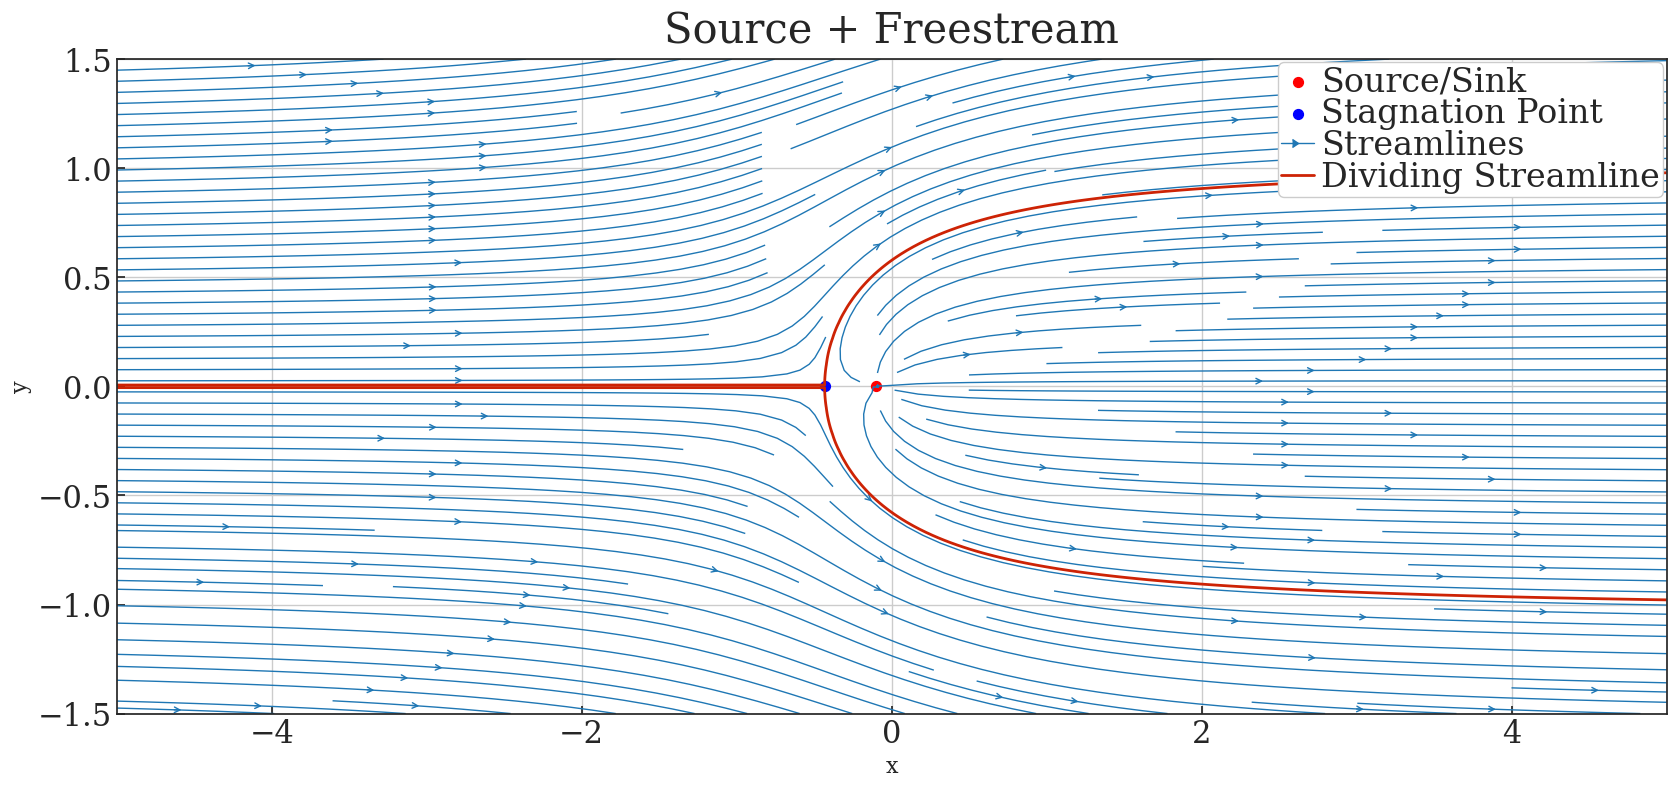

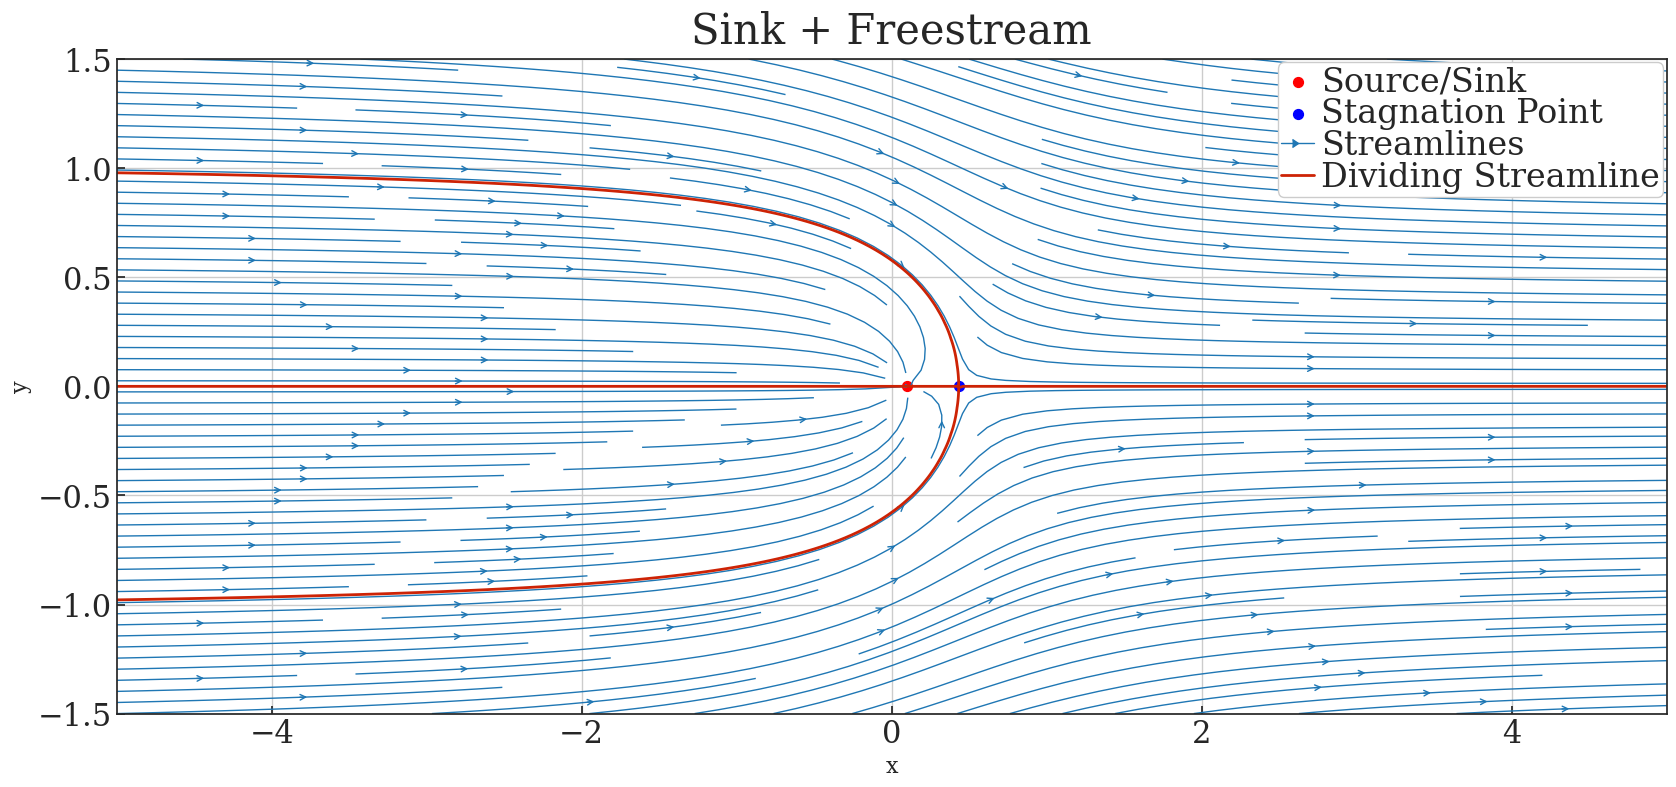

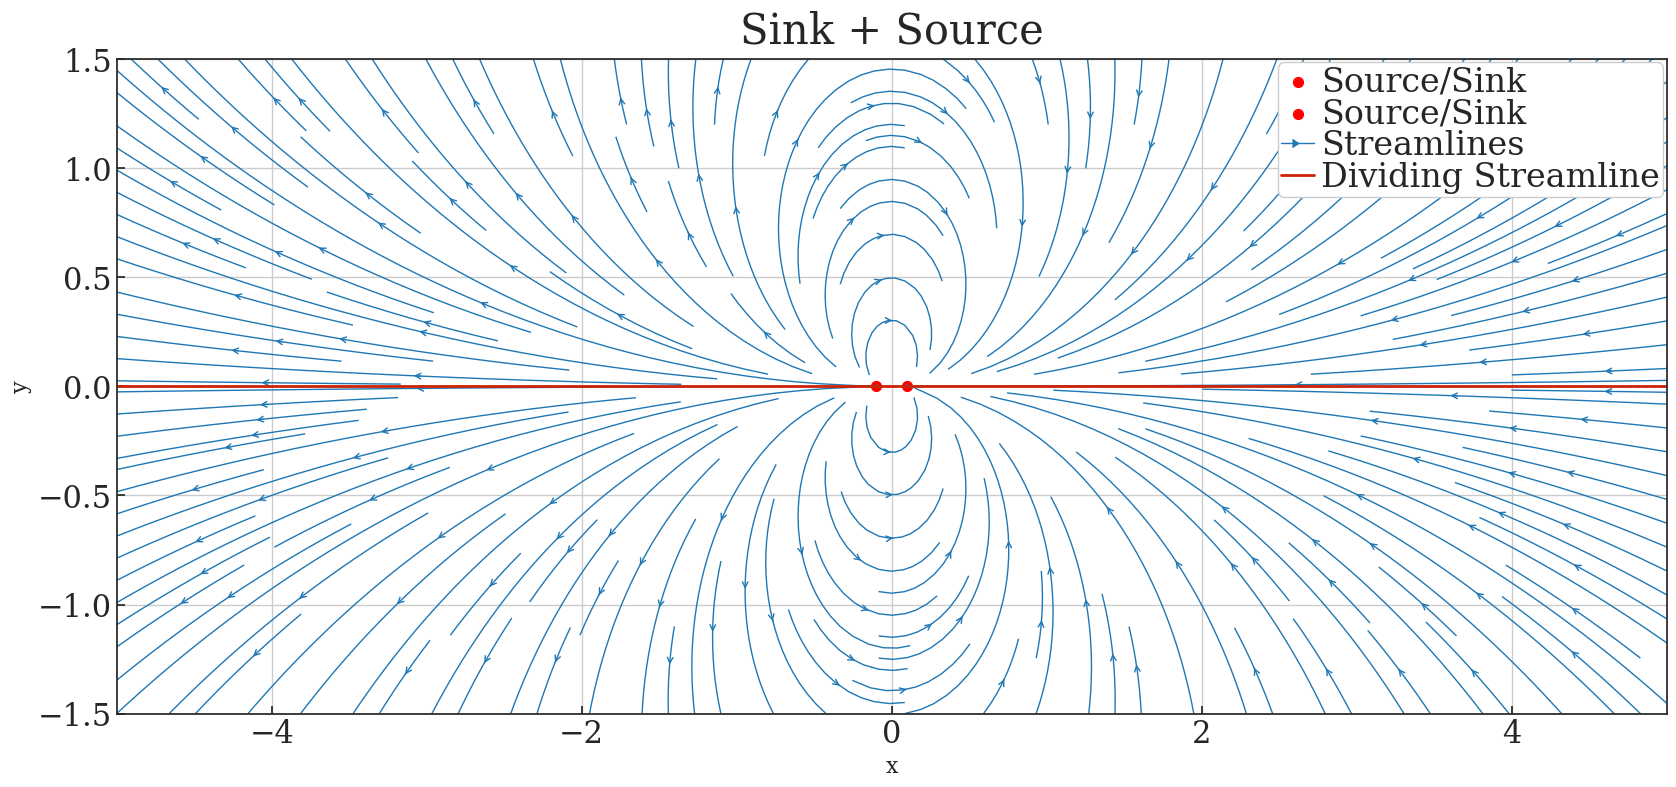

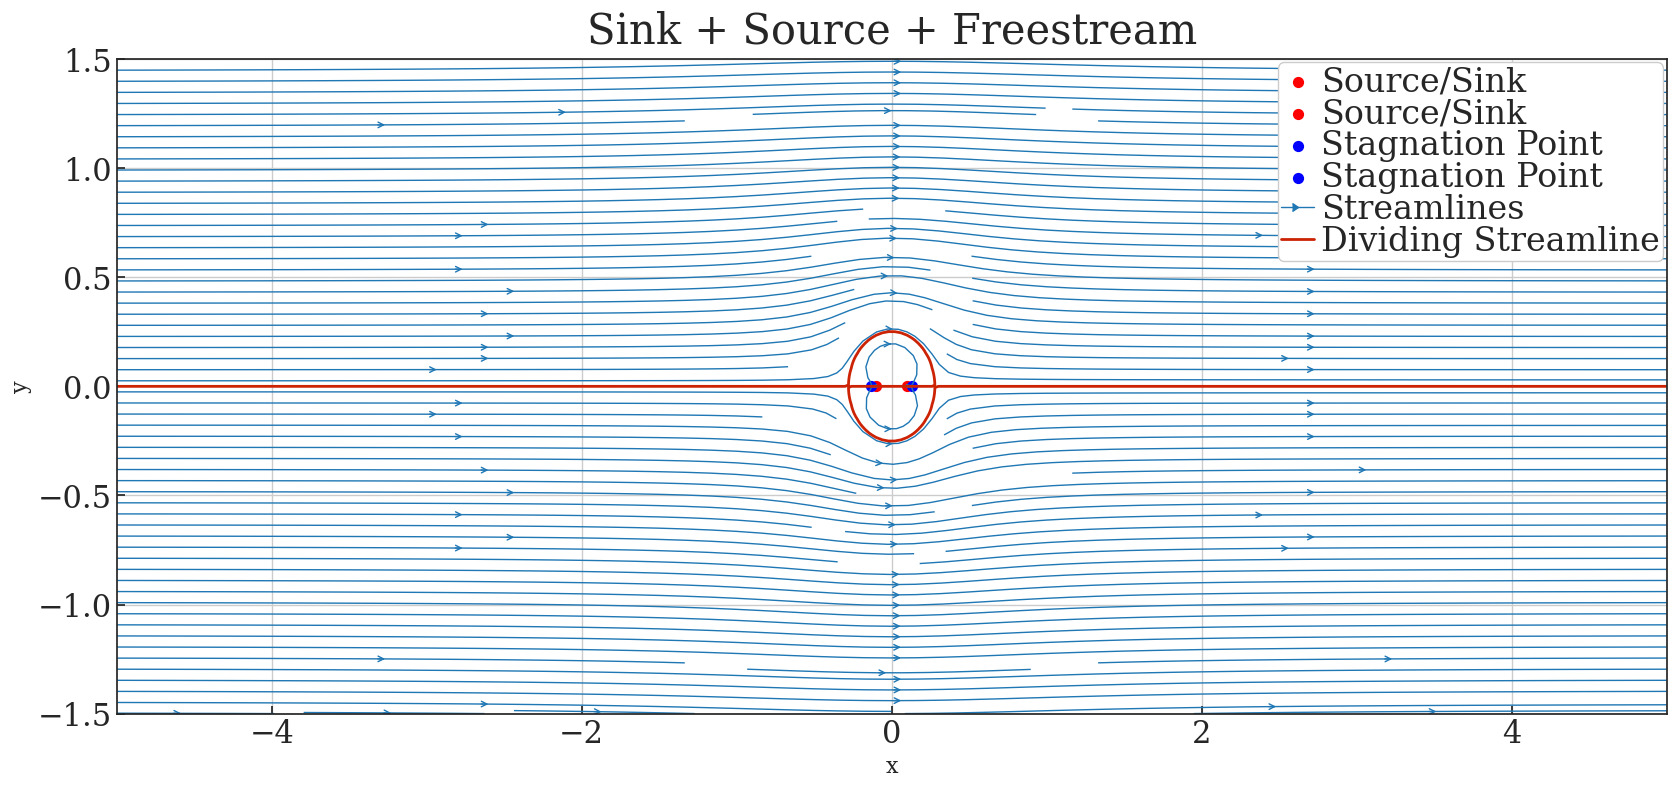

In [296]:
#Plot a doublet using the superposition of a freestream flow, a source, and a sink TODO: add legends

N = 250                                         # Number of points/sections to use in each direction for our flow
x_start, x_end = -5.0, 5.0                      # Boundaries of our flow in the x direction 
y_start, y_end = -1.5, 1.5                      # Boundaries of our flow in the y direction 

# Note, you can adjust the start and end points later to get the best image of your plot / flow

x = np.linspace(x_start, x_end, N)              # 1D array of x points
y = np.linspace(y_start, y_end, N)              # 1D array of y points
X, Y = np.meshgrid(x, y) 

u_inf = 1.2                                    # Freestream flow velocity

# Computing the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Computing the stream-function
psi_freestream = u_inf * Y


def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_source from the equations above
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)

    # Here, input the equation for v_source from the equations above
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    # Here, input the equation for psi from the equations above
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi



source_strength =  2.5                      # Strength of source singularity
x_source = -0.1                             # X coordinate of source singularity
y_source =  0.0                             # Y coordinate of source singularity        

# Here, we use some simple code to set up information about our source. 
# Next we use the functions above to create the source and sink contributions to u, v and psi. 

u_source, v_source = get_velocity(source_strength, x_source, y_source, X, Y)
psi_source = get_stream_function(source_strength, x_source, y_source, X, Y)

sink_strength = -1*source_strength
x_sink = 0.10

u_sink, v_sink = get_velocity(sink_strength, x_sink, y_source, X, Y)
psi_sink = get_stream_function(sink_strength, x_sink, y_source, X, Y)

# As we can see, the inputs for both functions are the same.

            #                         #
            # ***STAGNATION POINTS*** #
            #                         # 


# Theory for where the stagnation point should be for a freestream flow + source + sink, assuming they are symmetrically placed

x_stag_ssf_1 = np.sqrt(-1*np.pi*u_inf*(-2*np.pi*x_sink**2-2*x_sink*source_strength))/(np.sqrt(2)*np.pi*source_strength)
x_stag_ssf_2 = -1*x_stag_ssf_1

# Stagnation points for a source in a freestream:
x_stag_source_freestream = -1* source_strength/(2*np.pi*u_inf) + x_source

# Stagnation points for a sink in a freestream:
x_stag_sink_freestream = -1*sink_strength/(2*np.pi*u_inf) + x_sink


            #                         #
            # ***STAGNATION POINTS*** #
            #                         # 

width = 20
height = 8.5
# Setting up standard plotting functions once again


def plotScenario(U_Total,V_Total,psi_Total,stagLoc,sourceLoc,name):

    #plot the combined flows

    # The "total" variables now account for the contributions to the flow from both the source and the freestream. 
    # We can now plot this the same way we have above. 

    plt.figure(figsize=(width, height))

    plt.title(name)
    plt.grid(True)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xlim(x_start, x_end)
    plt.ylim(y_start, y_end)

    # Streamplot is a new plotting function that we will use to display the streamlines. 
    # Notice that when plotting the freestream flow, now we should use U_Total and V_Total 
    plt.streamplot(X, Y, U_Total, V_Total, density=2,linewidth=1, arrowsize=1, arrowstyle='->')

    # A new plotting function we will use is contour(), this creates a contour of the flow. 
    # We call this contour the *dividing streamline*. This requires an accurate stream function psi.
    if name == "Source + Freestream":
        plt.contour(X, Y, psi_Total, levels=[source_strength/2], colors='#CD2305', linewidths=2, linestyles='solid');
        plt.contour(X, Y, psi_Total, levels=[-1*source_strength/2], colors='#CD2305', linewidths=2, linestyles='solid');
    else:
        plt.contour(X, Y, psi_Total, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');


    # We should also a point to the plot to represent the location of the source. 
    # Remember that we should do this for every source and sink that we add, and we should make sure to 
    # differentiate between sources and sinks when we have both. 
    if sourceLoc != 0:
        for location in sourceLoc:
            plt.scatter(location, y_source, color = 'red', s = 50, marker ='o',label = "Source/Sink")
    
    if stagLoc != 0:
        for location in stagLoc:
            plt.scatter(location,0, color = "blue", s = 50, marker = 'o',label = "Stagnation Point")
    #plt.scatter(x_stag_2, y_source, color = "blue", s = 50, marker = 'o')

    plt.plot([5,5.01],[5,5.01],label = "Streamlines",color = colors[0],linewidth = 1, marker = 5) #add a line of the same color in the top right corner to trick the legend into displaying correctly
    plt.plot([5,5.01],[5,5.01],label = "Dividing Streamline",color = '#CD2305',linewidth = 2)
    plt.legend(framealpha = 1,loc = "upper right")

#plot a source + freestream
U_Total = u_freestream + u_source 
V_Total = v_freestream + v_source 
psi_Total = psi_freestream + psi_source
sLocation = [x_source]
stagLoc = [x_stag_source_freestream]
plotScenario(U_Total,V_Total,psi_Total,stagLoc,sLocation,"Source + Freestream")

#plot a sink + freestream
U_Total = u_freestream + u_sink 
V_Total = v_freestream + v_sink 
psi_Total = psi_freestream + psi_sink 
sLocation = [x_sink]
stagLoc = [x_stag_sink_freestream]
plotScenario(U_Total,V_Total,psi_Total,stagLoc,sLocation,"Sink + Freestream")

#plot a source and a sink near each other
U_Total = u_sink + u_source
V_Total = v_sink + v_source
psi_Total = psi_sink + psi_source
sLocation = [x_source,x_sink]
stagLoc = 0
plotScenario(U_Total,V_Total,psi_Total,stagLoc,sLocation,"Sink + Source")

#plot a source and a sink near each other in a freestream

U_Total = u_freestream + u_sink + u_source
V_Total = v_freestream + v_sink + v_source
psi_Total = psi_freestream + psi_sink + psi_source
sLocation = [x_source,x_sink]
stagLoc = [x_stag_ssf_1,x_stag_ssf_2]
plotScenario(U_Total,V_Total,psi_Total,stagLoc,sLocation,"Sink + Source + Freestream")

#plot a doublet



plt.show()

The four plots above are four examples of super positions of various elementary flows, with each element labeled.

The final portion of part 1 asks to plot the dividing streamline diameter as a function of the source strength for the source in freestream flow.
The diameter of the dividing streamline (or, more accurately, width) in this particular case can be found as: $$Width = {\Lambda\over{V_\infty}}$$ The derivation is left as an exercise to the grader. Plotting this width vs the source strength is shown in the next code segment, where $\Lambda \in \left[0,10\right] {m^2\over sec}$

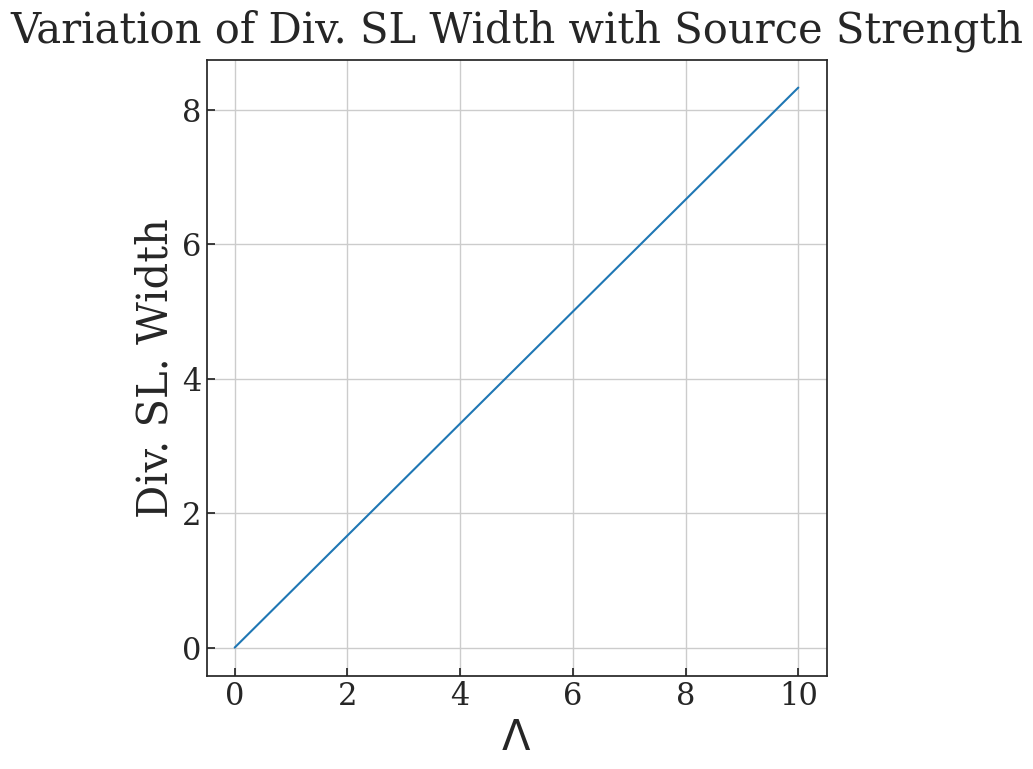

In [297]:
#Diameter vs source strength

Lambda = np.linspace(0,10,100)
Width = Lambda/u_inf

plt.figure(figsize=(8,8))
plt.title("Variation of Div. SL Width with Source Strength")
plt.xlabel(r"$\Lambda$")
plt.ylabel("Div. SL. Width")

plt.plot(Lambda,Width,color = colors[0]);


The relationship between the width of the dividing streamline and the strength of the source is linear, with a slope equal to the reciprocal of the freestream velocity. In other words, as the strength of the source increases, the width of the dividing streamline also increases.

<hr>

## Problem 2: Potential Flow Airfoil Representation

This problem asks to create a potential flow that approximates a NACA 0015 airfoil. 


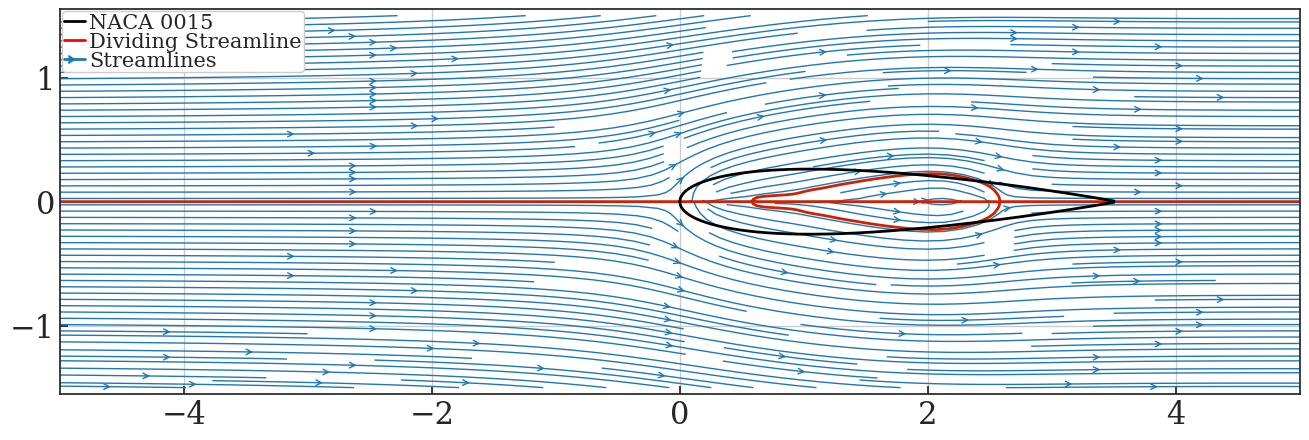

In [305]:
#Plot airfoil and potential approximation

#plot NACA 0015 airfoil the same way it was plotted in project 1, using the function already created:
stepsize = 0.00025
def naca4(m_in,p_in,t_in): #creates the x and z arrays of the airfoil and plots them given 4 digit naca number
    m = m_in/100
    p = p_in/10
    t = t_in/100
    x = np.arange(0,1+stepsize,stepsize)
    upper = np.empty(0)
    lower = np.empty(0)
    camber = np.empty(0)

    if (m == 0) and (p == 0):
        camber = np.zeros(len(x))
    else:
        for i in x:
            if (i<p):
                camber = np.append(camber,((m/(p**2)) * (2*p*i - i**2)))
            else:
                camber = np.append(camber,((m/((1-p)**2)) * ((1 - (2*p)) + 2*p*i - i**2)))
    i = 0
    for j in x:
        upper = np.append(upper,camber[i] + (t/0.2)*(0.2969*(j)**(1/2) - 0.1260*j - 0.3516*j**2 + 0.2843*j**3 - 0.1015*j**4))
        lower = np.append(lower,camber[i] - (t/0.2)*(0.2969*(j)**(1/2) - 0.1260*j - 0.3516*j**2 + 0.2843*j**3 - 0.1015*j**4))
        i += 1


    return upper,lower,camber, x

upperSurface, lowerSurface, camber, x_airfoil = naca4(0,0,15) #generate data for a NACA 0015 airfoil

U_Total = 0
V_Total = 0
psi_Total = 0

Strengths = np.array([4, 3, 1, 1, 1, 1, 1, 1, 1, -2, -4])
x_loc = np.array([0.1, 0.2, 0.3, 0.6, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 3,])
y_loc = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# The above arrays define the data/definitions to create 4 different sources/sinks. 
# Lets see how we can write our for loop in order to loop through this data.

n = len(Strengths)                  # n is the number of sources/sinks we would like to create. 

# As a reminder, a for loop repeats the code inside a certain number of times, in this case, we repeat the code and change the value i on each repetition.

for i in range(0,n):              # This line basically reads for all values of i between 0 and n (in this case 4)
    u, v = get_velocity(Strengths[i], x_loc[i], y_loc[i], X, Y)
    psi = get_stream_function(Strengths[i],x_loc[i], y_loc[i], X, Y)

    U_Total += u
    V_Total += v

    psi_Total += psi

u_inf = 8
u_freestream = u_inf * np.ones((N, N), dtype=float)
psi_freestream = u_inf * Y

U_Total += u_freestream
V_Total += v_freestream
psi_Total += psi_freestream

#rescale the x and z to the chord that was asked for
upperSurface = 3.5 * upperSurface
lowerSurface = 3.5 * lowerSurface
x_airfoil = x_airfoil * 3.5

plt.figure(figsize=(16,5))
plt.rc('legend',fontsize=15) #change legend size to accomodate large titles

plt.streamplot(X, Y, U_Total, V_Total, density=2,linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi_Total, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid')

plt.plot(x_airfoil,upperSurface,color = "black", linewidth = 2)
plt.plot(x_airfoil,lowerSurface,color = "black", linewidth = 2)
plt.axis("equal")

line1 = mlines.Line2D([], [], color='black', linestyle='-', linewidth=2, label='NACA 0015 Airfoil')
line2 = mlines.Line2D([], [], color='red', linestyle='-', linewidth=2, label='Dividing Streamline')
line3 = mlines.Line2D([], [], color=colors[0], linestyle='-', linewidth=2, marker = 5, label='Streamlines')
line1 = mlines.Line2D([], [], color='blue', linestyle='-', linewidth=2, label='Quadratic')

plt.legend(handles = [line1,line2,line3],loc="upper left",framealpha = 1);


